## 목표

- 버섯의 특징을 활용해 독/ 식용 이진 분류해보자
- Desicison Tree 모델 활용해보자
- Decision Tree 학습현황 열기
- 특성의 중요도 파악하기(불순한 정도를 파악하는 것 지니 불순도)

## 임포트하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# train, test 랜덤 샘플링 도구
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 데이터 불러오기

In [2]:
# data 변수에 담아주기
# data 폴더에 있는 mushroom 가져오기
data = pd.read_csv('./data/mushroom.csv')
pd.options.display.max_columns = None # 모든 컬럼 가져오기
# pd.set_option('display.max_columns', None)
data
# 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
data
#stalk-root : ? 데이터가 들어있다.
# 모든 컬럼에는 문자열 데이터만 들어있다.

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# 데이터 전처리 및 탐색
- 문제(특성)과 답(레이블) 분석
- X,y 간단한 통계량 확인
- 머신러닝 모델은 숫자만을 인식할 수 있음: 문자 > 숫자
- 훈련셋, 테스트 셋 분리

In [4]:
X = data.iloc[:,1:]
y = data.iloc[:, :1]

In [5]:
# 통계량 확인해보기
# describe()
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


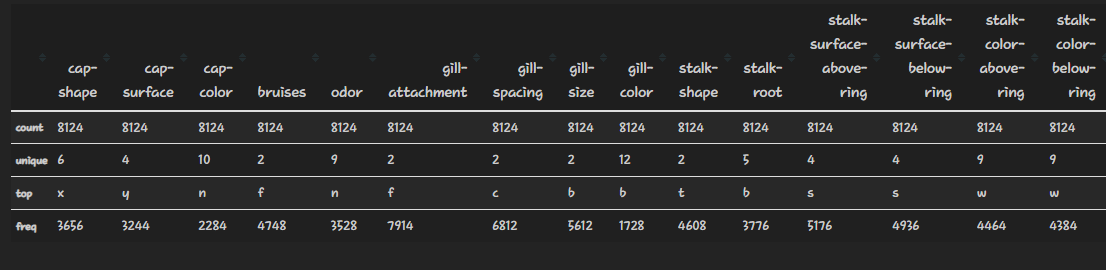
- count: 각 행의 개수
- 최빈값: freq
- unique : 중복 없는 카테고리
- top : 최빈값의 ObjectValue

In [6]:
y.value_counts()
# 식용이 조금더 많다.

poisonous
e            4208
p            3916
dtype: int64

##   데이터 전처리 
1. Label Encoding : 레이블을 숫자로 mapping
- X1["capshape"] = X1["capshape"]{"X": 0 , }...

2. One hot Encoding : 분류하고자 하는 범주(종류) 만큼의 자리수를 만들고 단 한개의 1과 나머지 0으로 채워서 숫자화 하는 방식
- X_one_hot = pd.get_dummies(X2)
- X2 = 원하는 인코딩 데이터




## 문자 > 숫자 인코딩
- 값의 크고 작음이 의미가 있을 때 : 원 핫 인코딩
- 값의 크고 작음의 의미가 있을 때 : 레이블 인코딩

## 원핫 인코딩 


In [7]:
X_one_hot = pd.get_dummies(X)
X_one_hot
# 크기 확인
print(X_one_hot.shape, X.shape)

(8124, 117) (8124, 22)


## 훈련셋 테스트 셋 분리
- 7:3 비율
- 랜덤 스테이트 7
- 크기확인

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot ,y , test_size= 0.3 , random_state = 7)
print('훈련셋 :', X_train.shape, y_train.shape)
print('테스트 셋 :', X_test.shape, y_test.shape)

훈련셋 : (5686, 117) (5686, 1)
테스트 셋 : (2438, 117) (2438, 1)


## 모델링
- 모델 생성
- 모델 학습
- 교차검증 진행해보기
- 모델, 예측 및 평가
- 특성의 중요도 파악
- 학습 현황 시각화 (tree 모델은 질문을 던지고 학습을 시각화 합니다, whitebox )
- 필요하다면 과대적합을 제어하는 파라미터 연결해보기 

In [9]:
# 하이퍼 파라미터를 별도로 정의하지 않기 , 기본값으로 연결
# tree_model 변수에 모델 생성
tree_model = DecisionTreeClassifier()

# 모델학습 해보자
# fit(훈련 문제, 훈련 답)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

##  교차검증 : 모델의 일반화 성능 확인
1. 모든 데이터에 대해 모델이 얼마나 잘 맞추는가
      - 모델의 일반화 성능 확인
      - 모든 데이터에 대해 모델이 얼마나 잘 맞추는지 평가, 한 번 나눠서 평가하는 것보다 여러번 하기 때문에 더 안정적인 통계적 평가 방법
2. 방법론 : 훈련세트와 테스트 세트로 나눠서 평가
     - 진행시점: 모델을 생성하고 학습하기 전에도 진행 가능
    

In [10]:
# 도구 불러오기
from sklearn.model_selection import cross_val_score

In [11]:
# estimator : 예측기 -> 모델명
# X,y : 문제, 답데이터
# cv(cross validation) : 교차검증 횟수(테스트를 분리할 횟수)
# tree_model한테 X_train,y_train 활용해서 5번의 교차검증 함
cv_result = cross_val_score(tree_model,
                            X_train,
                            y_train,
                            cv=5)
print('교차검증 결과:', cv_result)
print('교차검증 평균:', cv_result.mean())
# 5번 진행한 후의 결과가 대부분 100% 성능 내고 있음
# 나름대로 신뢰할만한 모델임
# 모델이 학습을 잘했음 
# -> 모델의 하이퍼 파라미터를 제어하지 않아도 내부 규칙 생성이 알맞게 됨 
# p,e인지 판단하기 위한 특성 설명이 충분했음(데이터 좋았음)
# 하이퍼 파라미터 제어하지 않아도 되는 상황

교차검증 결과: [1.         1.         1.         0.99912049 1.        ]
교차검증 평균: 0.9998240985048372


In [12]:
# test 예측 
# 모델.predict(문제)
pre = tree_model.predict(X_test)
pre

# 평가 : accuracy_score 
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pre)
# 모델.score(테스트문제,테스트답)
tree_model.score(X_test, y_test) # accuracy 정확도

1.0

In [13]:
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38861859e-03, 1.71136402e-02, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93849405e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [14]:
# 특성 중요도 np 배열 -> df 변환하면서 컬럼명 연결하기
fi_df =pd.DataFrame(fi, index =X_train.columns, columns = ['feature importances'])
# 내림차순 정렬
fi_df.iloc[:,0].sort_values(ascending = False)
fi_df.sort_values(by ='feature importances', ascending =False)

,feature importances
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


In [15]:
# 학습시킨 트리모델의 현황을 추출하는 코드
from sklearn.tree import export_graphviz
export_graphviz(tree_model, # 추출할 모델 
                out_file='tree.dot', #저장 경로 및 파일명
               class_names=['독','식용'],  # 그래프를 출력할 때 라벨 값 
               feature_names=X_one_hot.columns, #특징으로 남는 컬럼 , 컬럼명 이름 설정
               impurity=False, # 기본값, 
               filled=True) # 색감을 채울것인가?

In [16]:
# tree.dot -> out_file로 가져온 데이터 가져오기
import graphviz
with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()
dot_graph

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="odor_n <= 0.5\\nsamples = 5686\\nvalue = [2956, 2730]\\nclass = 독", fillcolor="#fdf5f0"] ;\n1 [label="stalk-root_c <= 0.5\\nsamples = 3214\\nvalue = [572, 2642]\\nclass = 식용", fillcolor="#64b2eb"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="stalk-surface-below-ring_y <= 0.5\\nsamples = 2819\\nvalue = [203, 2616]\\nclass = 식용", fillcolor="#48a5e7"] ;\n1 -> 2 ;\n3 [label="odor_l <= 0.5\\nsamples = 2686\\nvalue = [70, 2616]\\nclass = 식용", fillcolor="#3ea0e6"] ;\n2 -> 3 ;\n4 [label="odor_a <= 0.5\\nsamples = 2649\\nvalue = [33, 2616]\\nclass = 식용", fillcolor="#3b9ee5"] ;\n3 -> 4 ;\n5 [label="samples = 2616\\nvalue = [0, 2616]\\nclass = 식용", fillcolor="#399de5"] ;\n4 -> 5 ;\n6 [label="samples = 33\\nvalue = [33, 0]\\nclass = 독", fillcolor="#e58139"] ;\n4 -> 6 ;\n7 [label="samples = 37\\nvalue = [37, 0]\\nclass = 독", fillcolor="#e5

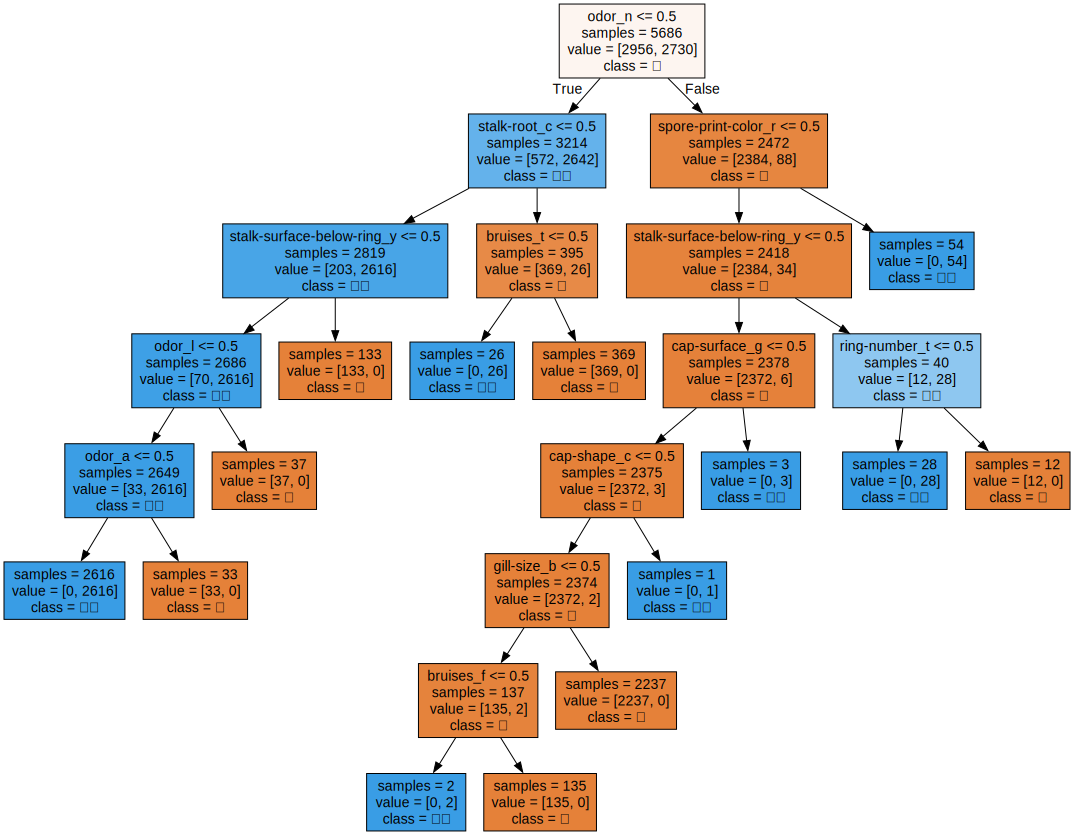

In [17]:
display(graphviz.Source(dot_graph))

In [ ]:
# graph 그리는 건 내일 이어서 환경변수 다시 잡고 실행
# 하이퍼 파라미터 이론 설명
# 타이타닉 데이터 활용해서 kaggle 대회 참여